In [ ]:
"""
Tutor MSAHIN
You can reach me on youtube, twitter, linkedin, medium and github with my @datasciengine username.
"""

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
from utils import show_img

### Görüntüden Yüz Tespit Etmek?

Bu nasıl mümkün olabilir?

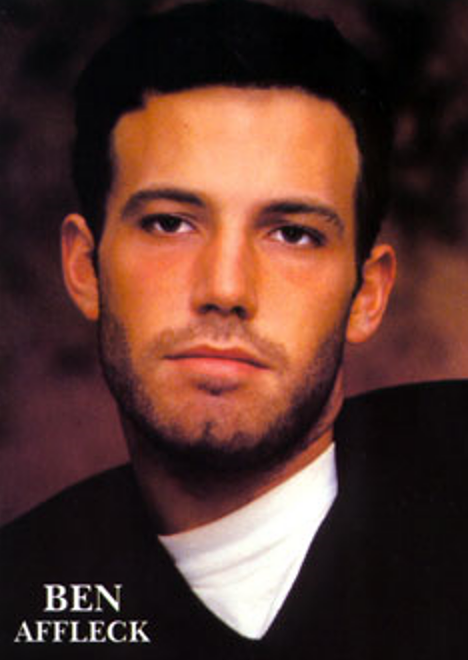

- Bir yüzü oluşturan unsurlar neler?

- Bu unsurların tespiti ne kadar zor?

- Kaç adet unsur uygun konumlarda bir araya gelirse buna yüz deriz?

...

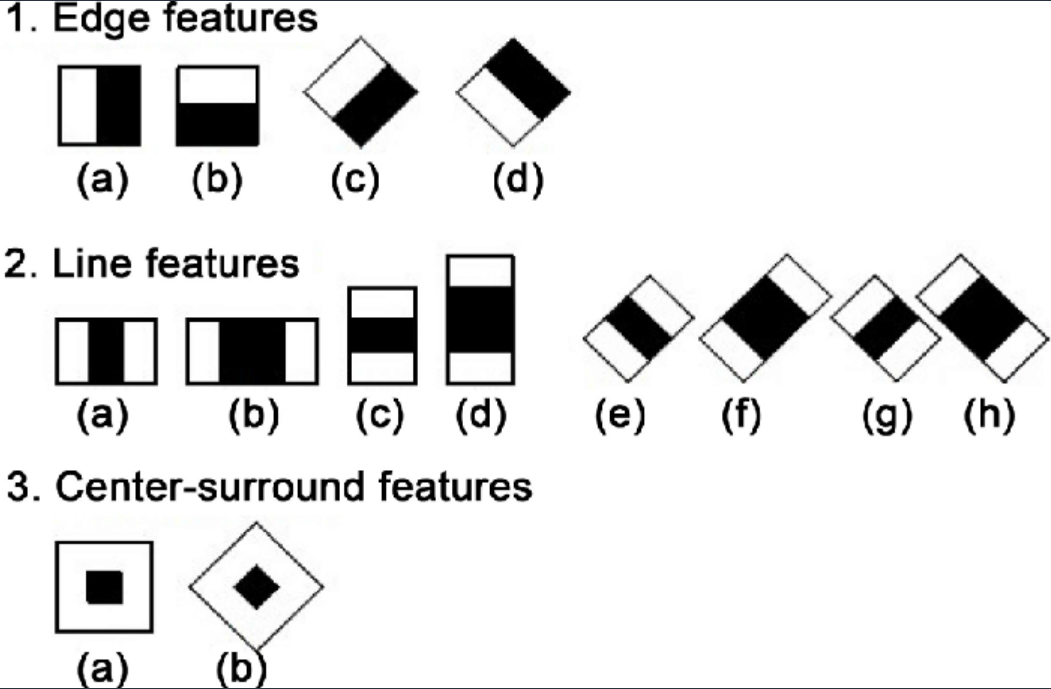

**Kenar özelliği**: Görüntü üzerinde belirli bir alan koyu alandan oluşuyor ve belirli bir alan açık renklerden oluşuyor ise kenar özelliği olduğunu belirtmektedir.


**Çizgi özelliği**: Görüntü üzerinde sırasıyla açık, kapalı, açık renklerden oluşuyor ise çizgi özelliği vardır.


**Dört-Kare Özelliği**: Çaprazlama olarak kare şeklinde koyu ve açık tonlar çapraz bir şekilde bulunuyor ise dört kare özelliğini belirtmektedir.

**Nedir bu özellikler?**

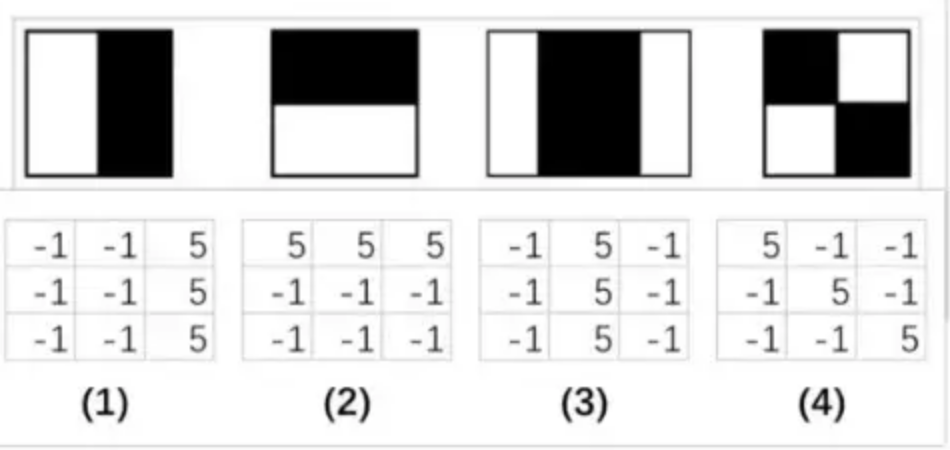

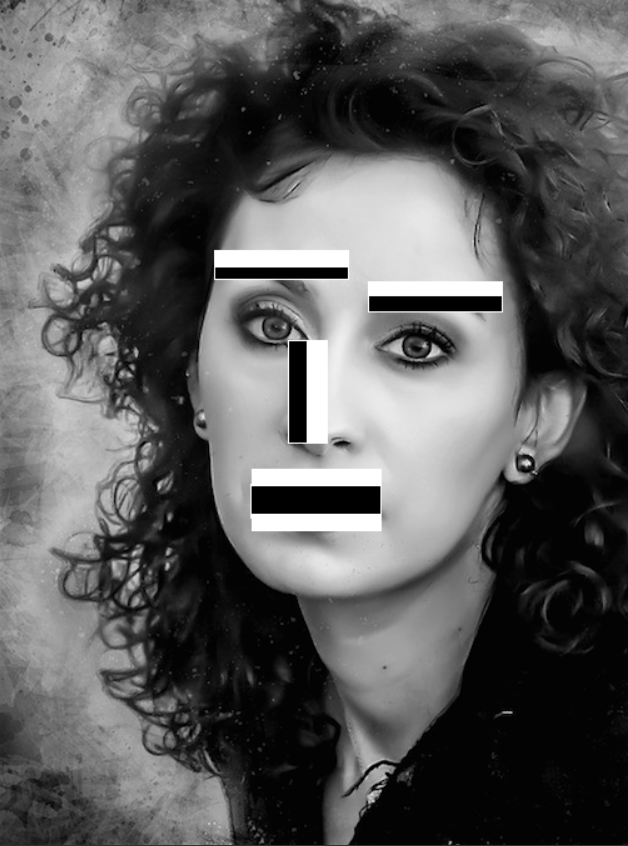

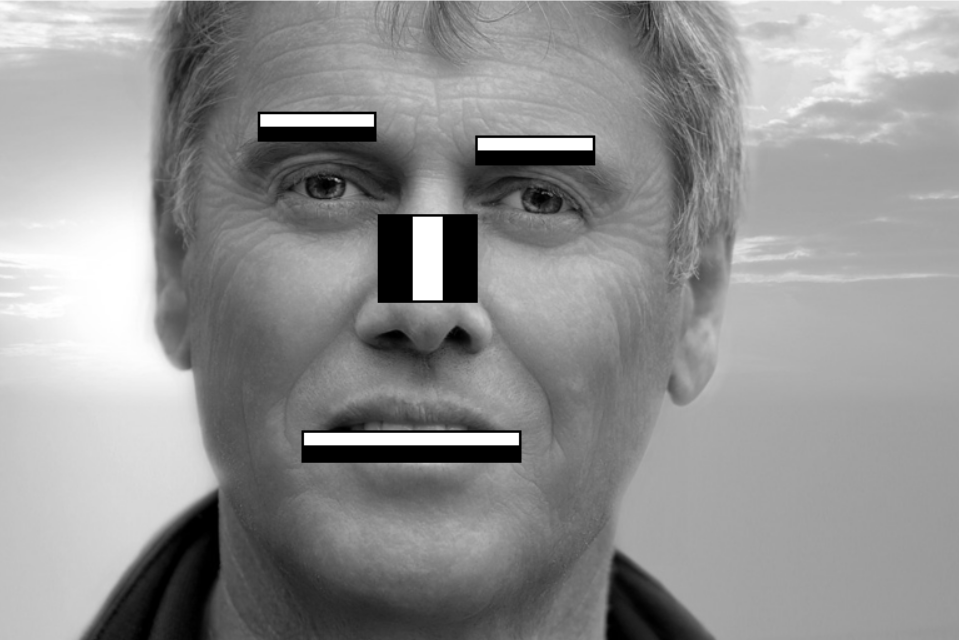

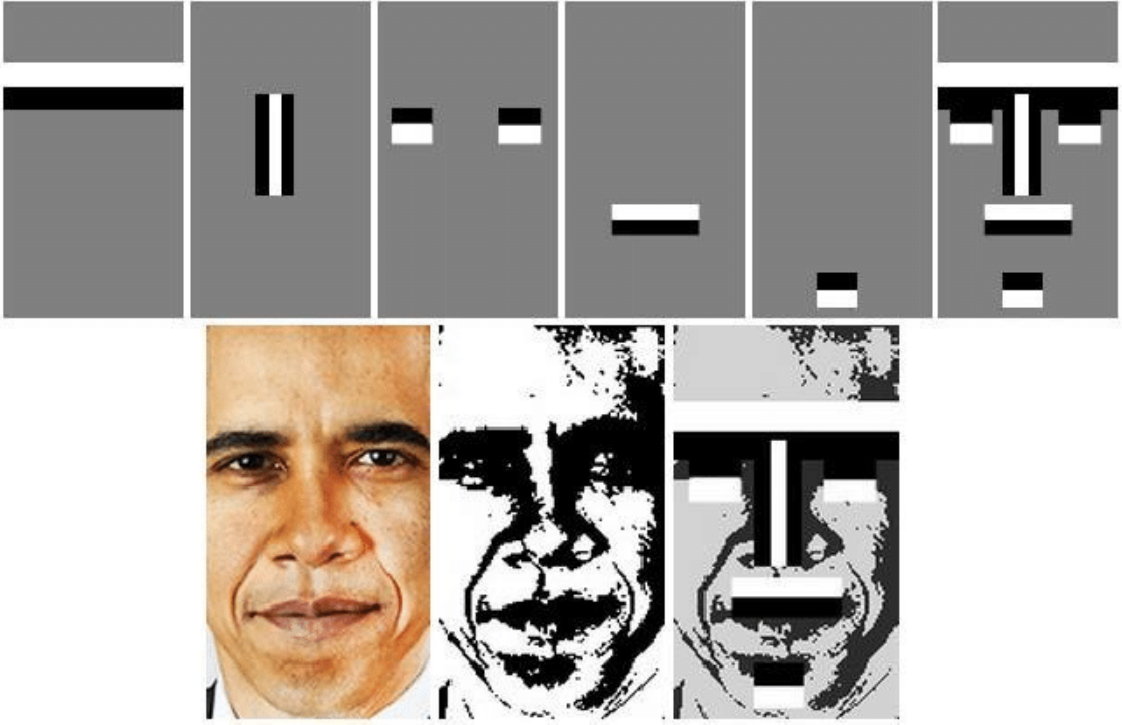

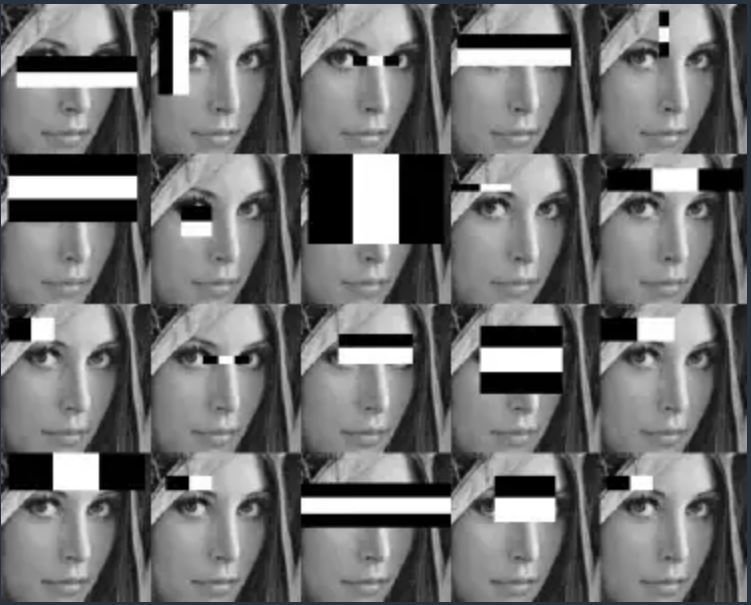

Convolution nasıl çalışıyordu ? Hatırlayalım.

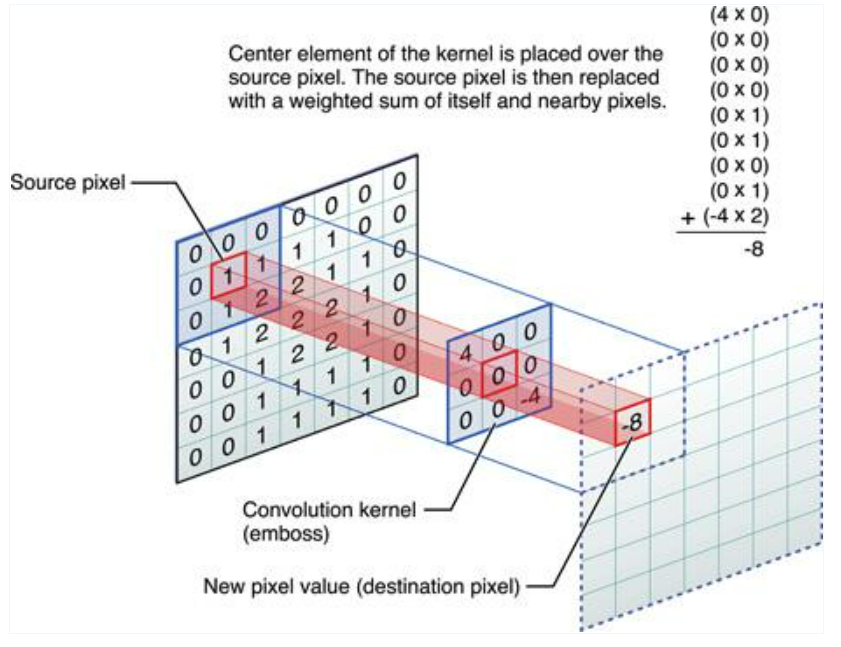

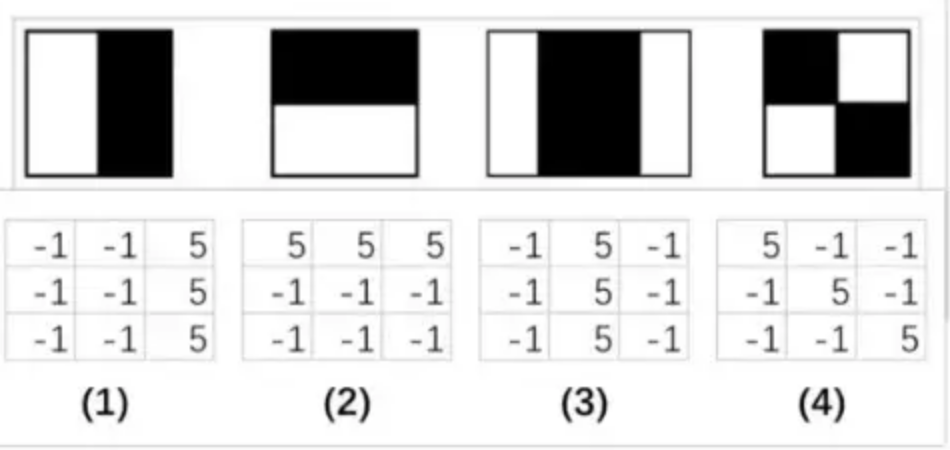

Resmin tamamı üzerinde (yüz olmayan kısımlarda dahil) konvolüsyon operasyonu yapmak, üstelik binlerce feature çıkabilir? Çok yüksek kompleksity demek, çözüm ?...

## İntegral image nedir?

Viola-Jones yönteminin aşamalarından biri oluşan ara imgenin entegral imgesinin oluşturulmasıdır. Entegral imge rekursif tanımlanmış olup her piksele sol ve üst tarafındaki pikselin değerinin toplanması ile elde edilir. Kümülatif toplam da denilen bu işleme aşağıdaki gibidir.

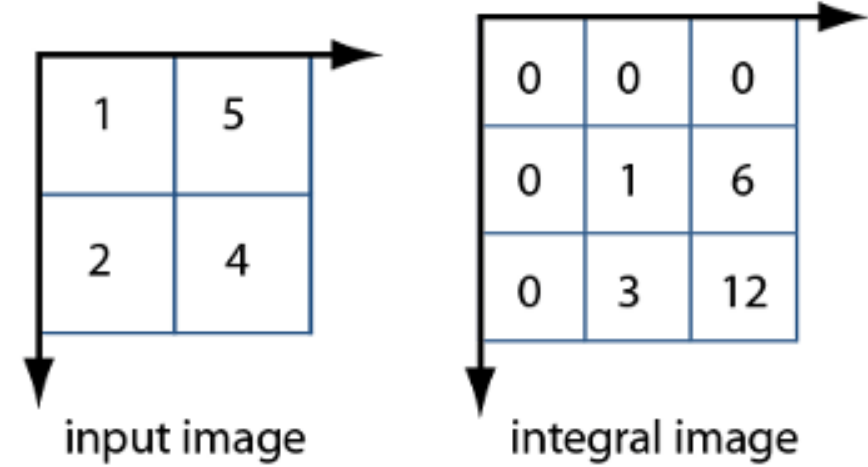

### Python'da nasıl integral image alınır?

In [2]:
import numpy as np

img = [ [1,5, 8 ],
        [7,6, 5]]

img = np.array(img)
cum_sum_row = np.cumsum(img, axis=1)
cum_sum_row

array([[ 1,  6, 14],
       [ 7, 13, 18]])

In [3]:
cum_sum_col = np.cumsum(img, axis=0)
cum_sum_col

array([[ 1,  5,  8],
       [ 8, 11, 13]])

Kısacası integral image...

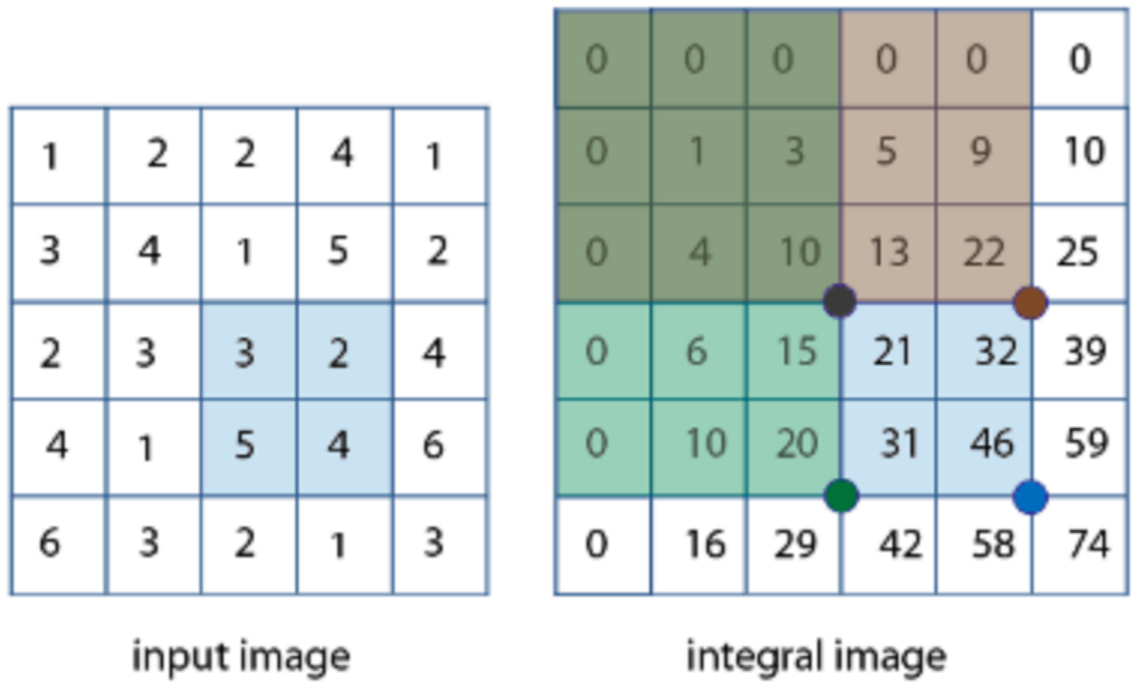

## Uygulamalı integral image

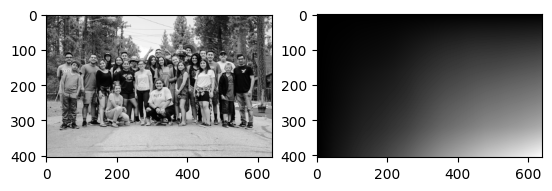

In [4]:
img = cv.imread("../VisualMaterials/Photos/people_1.jpg", 0)
img_int = cv.integral(img)

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(img_int, cmap="gray")
plt.show()

### Neden böyle bir şey yaptık?

https://www.quora.com/How-integral-image-is-used-in-image-processing-and-how-improves-the-computation-time

Temel fikri göz önünde bulundurarak, onu daha fazla toplama türüne genişletebilirsiniz. Kareler toplamını hesaplayabilirsiniz. Görüntüyü 45 derece döndürebilir ve ardından toplamları yapabilirsiniz. Ardından, dik veya 45 derece eğimli herhangi bir dikdörtgen bölgedeki toplamları hesaplayabilirsiniz.

Toplamları düzensiz alanlarda da hesaplayabilirsiniz (yine de yalnızca 90 derece köşeli olanlar). Sadece bu da değil, süper hızlı bulanıklaştırma, yaklaşık gradyanlar ve hesaplama araçları ve standart sapmaları çok hızlı yapabilirsiniz.

# Ve AdaBoost

Son olarak AdaBoost, yüz binlerce feature extract ettik, iyilerini nasıl seçeceğiz?

AdaBoost, tüm bu 160.000'den fazla özellik arasından en iyi özellikleri elde etmek için kullanılır. Bu özelliklere zayıf sınıflandırıcılar da denir. Bu özellikler bulunduktan sonra, tüm bu özelliklerin ağırlıklı bir kombinasyonu, herhangi bir pencerenin bir yüzü olup olmadığına karar vermede ve değerlendirmede kullanımdadır.


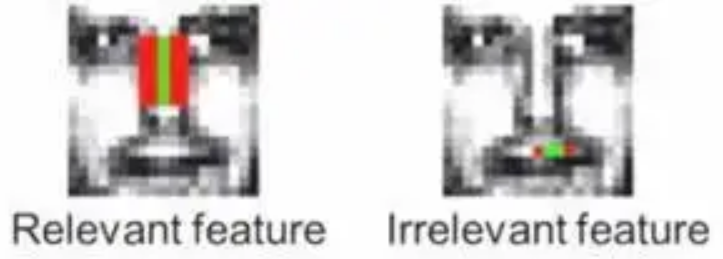

## Resimden Yüz Bulma

In [5]:
img = cv.imread('../VisualMaterials/Photos/people_1.jpg')
show_img(img,"Group of 5 people")

In [6]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show_img(gray,"Gray People")